# Подготовка данных
На данном этапе идет подключение необходимых библиотек и скачивание подготовленного датасета и аннотаций к нему с платформы Roboflow

In [ ]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
!pip install -r requirements.txt

import re
import torch
import os
import pathlib
from random import shuffle
from glob import glob
from IPython.display import Image, clear_output, display
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="6xQEqRQ0NTupOgINP2p8")
project = rf.workspace("asdasd-nwqom").project("faces-kpkzt")
dataset = project.version(2).download("yolov5")

In [ ]:
%%writefile dataset.yaml
train: Faces-2/train/images
val: Faces-2/valid/images

# Classes
nc: 1  # number of classes
names: ['face']

Writing dataset.yaml


# Обучение нейросети
Было решено выбрать в качестве гиперпараметров следующие значения:
1. Размер батчей/партии: **16** (в связи с затруднением работы сети при попытке увеличения размера до 32)
2. Количество эпох: **200** 
(при большем числе наблюдалось переобучение, о чем сигнализировало увеличение метрики ошибки object_loss)
3. В качестве весов использовали предобученные на 80 классах YOLOv5l веса, в результате уже за 5 эпох получили качество выше 0,6 mAP50
4. Фиксированным размером изображения было выбрано значение 416, которое используется в документации к архитектуре в связи с быстротой обучения на более низком разрешении

In [ ]:
%%time
!python train.py --img 416 --batch 16 --epochs 200 --data dataset.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt --name yolov5l_results  --cache

In [ ]:
from google.colab import files
files.download("runs/train/yolov5l_results2/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Подсчет метрик

In [ ]:
# значения метрик при обучении на 200 эпохах
!python val.py --weights runs/train/yolov5l_results2/weights/best.pt --data dataset.yaml --img 416 --half

Результаты обучения 200 эпох:

- Images: 442
- Instances: 2268         
- P: 0.972          
- R: 0.928
- mAP50: 0.968
- mAP50-95: 0.784
- box_loss: 0.01081
- obj_loss: 0.01204

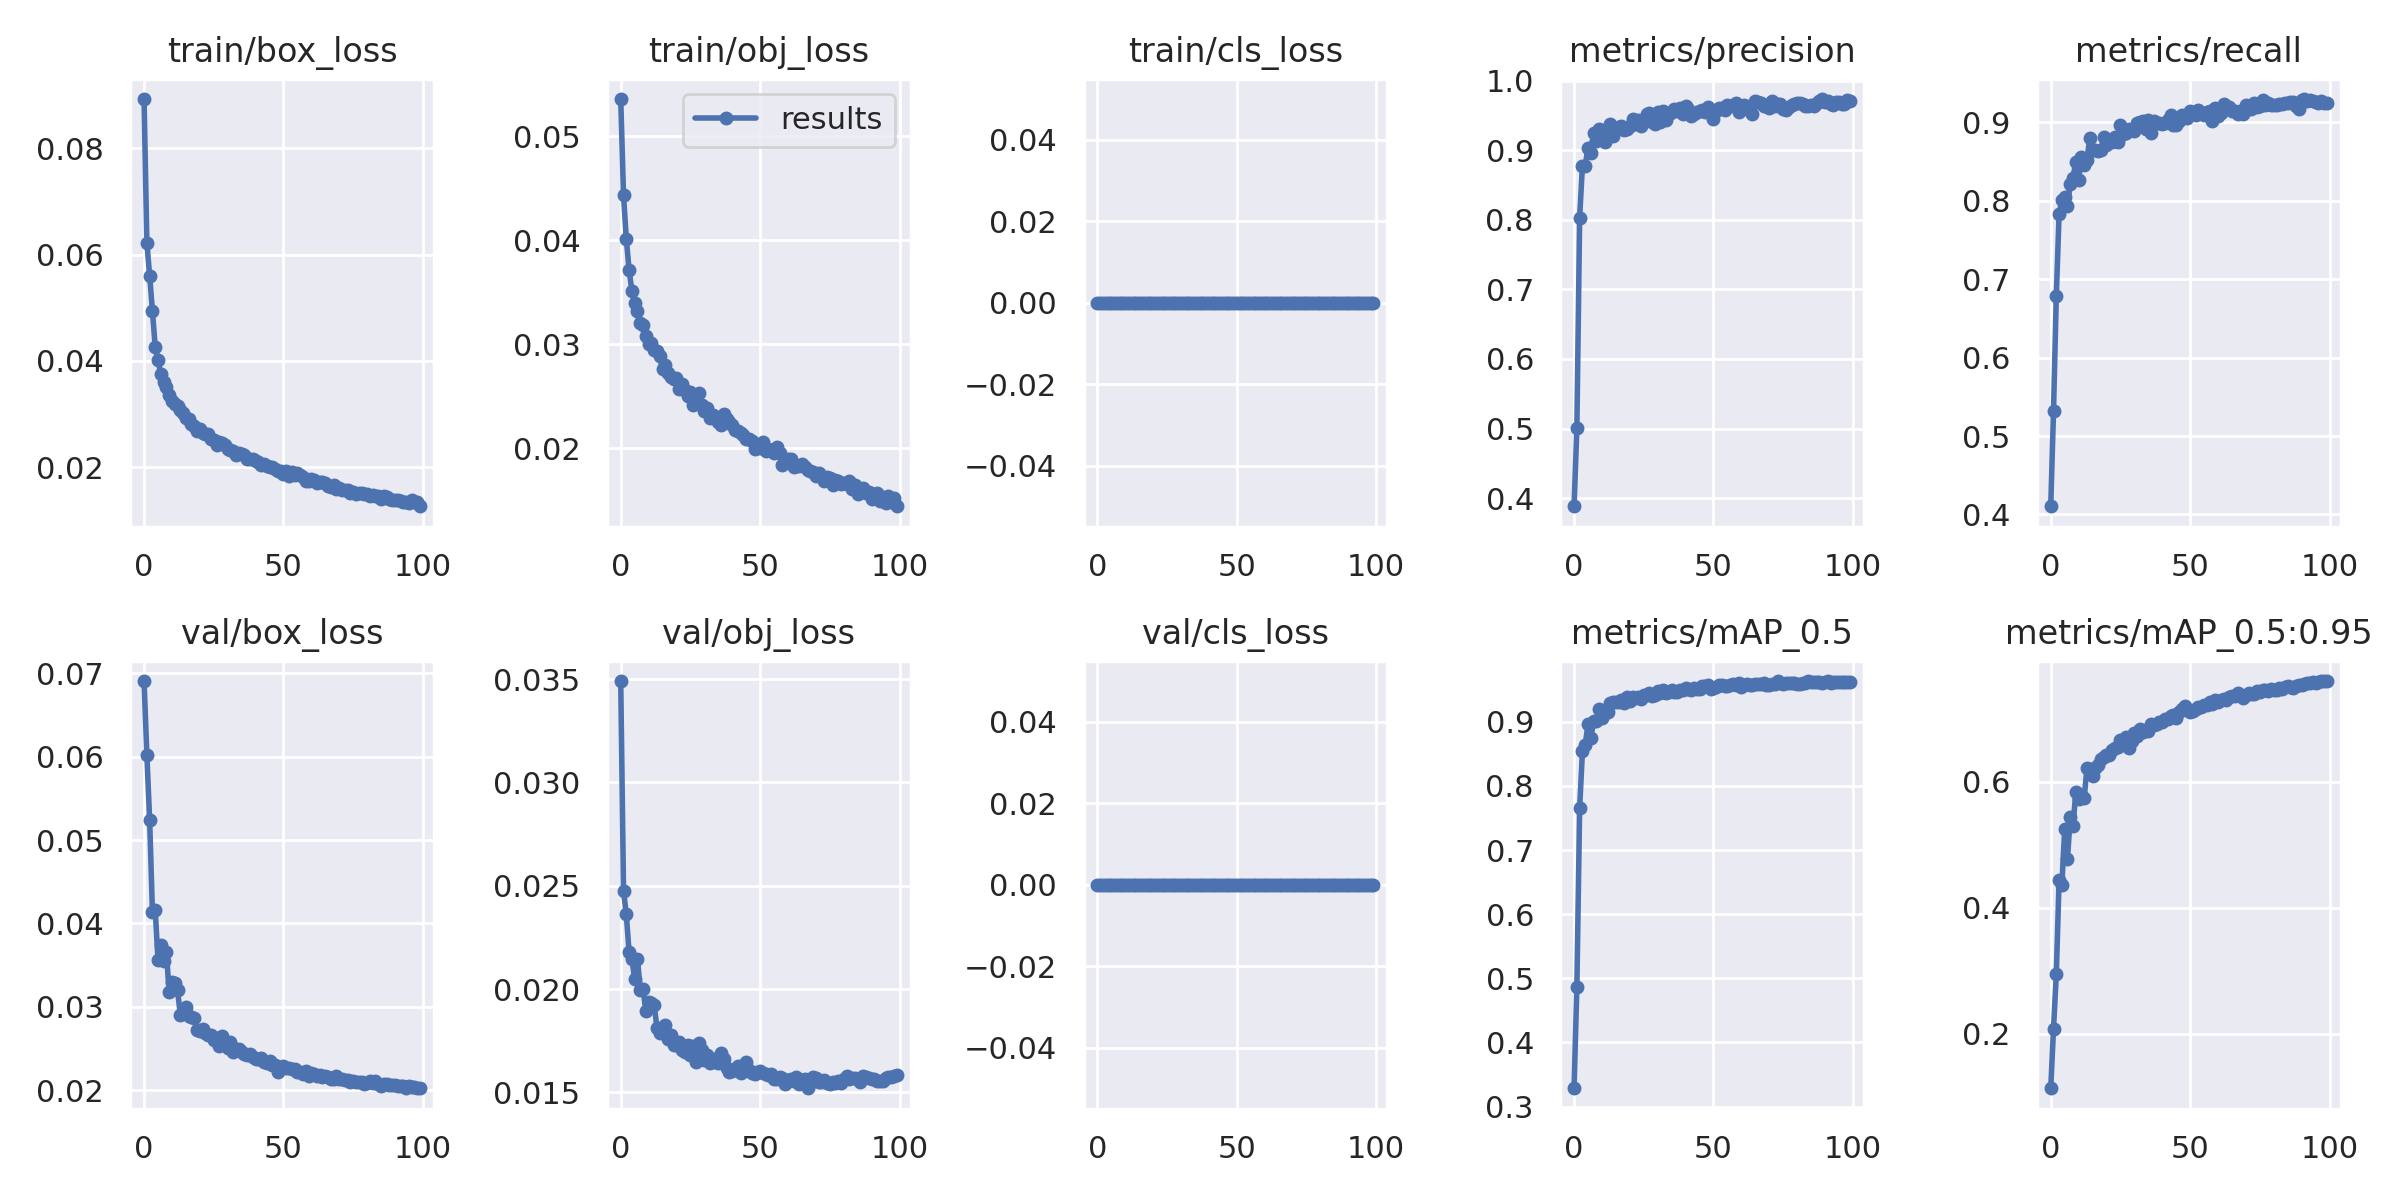

In [ ]:
# результаты обучения 100 эпох
Image(filename='/content/yolov5/runs/train/yolov5l_results/results.png', width=1000) 

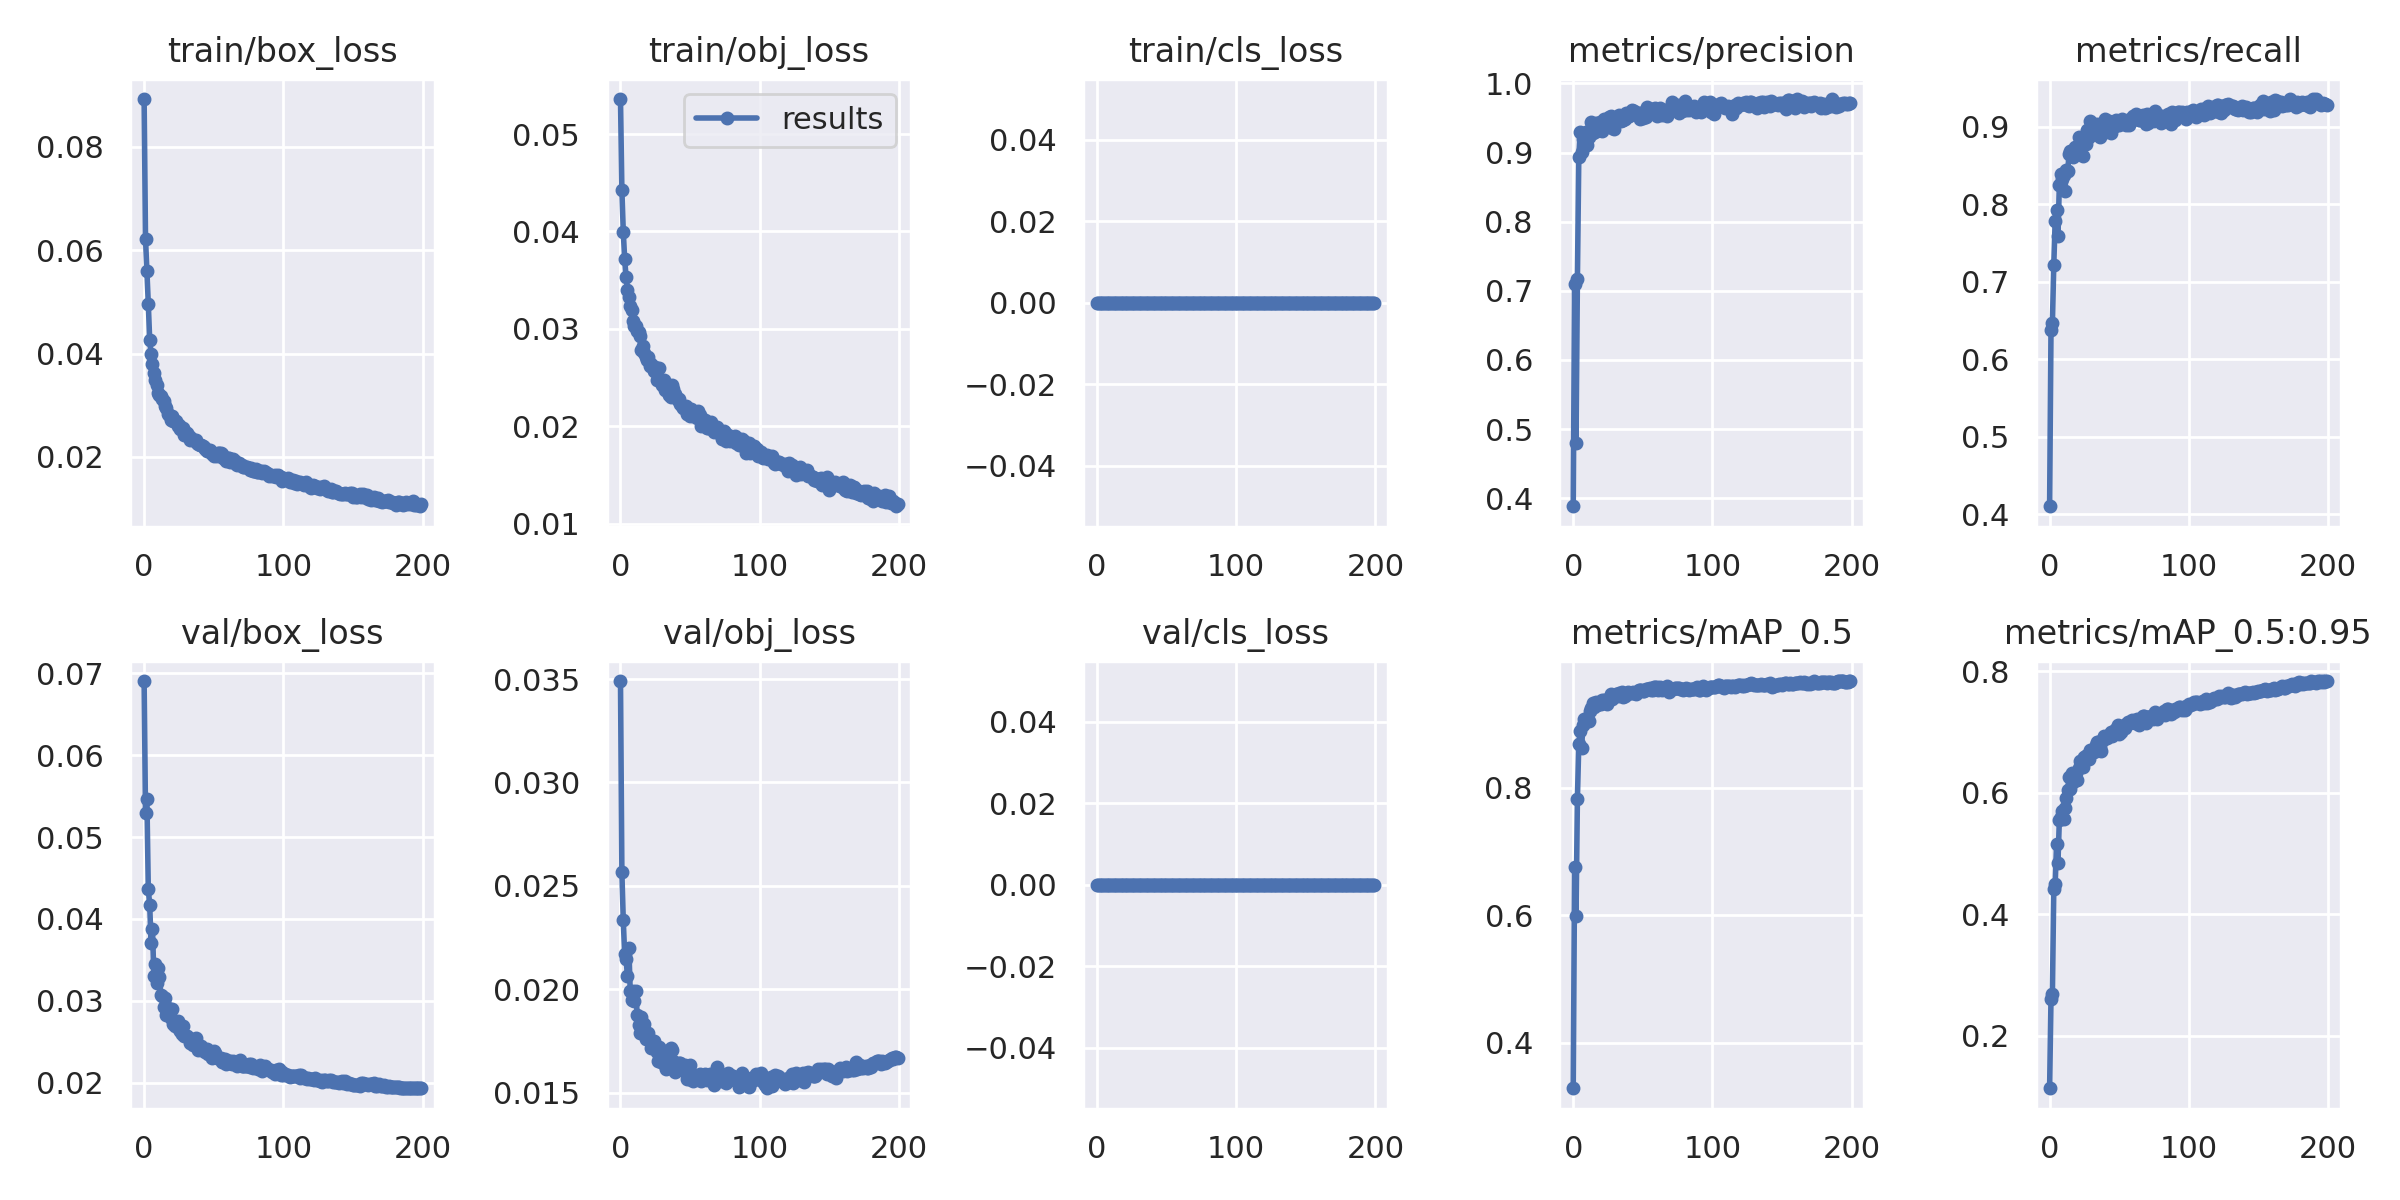

In [ ]:
# результаты обучения 200 эпох
Image(filename='/content/yolov5/runs/train/yolov5l_results2/results.png', width=1000) 

# Валидация (inference)
### Возможные проблемы в распознавании:
1. Маски✅
2. Головные уборы✅
3. Тень ✅
4. Присутствие нескольих людей✅
5. Очки✅
6. Засвет✅

In [ ]:
!python detect.py --weights ../best200.pt --img 416 --conf 0.5 --source Faces-2/test/images --save-txt 

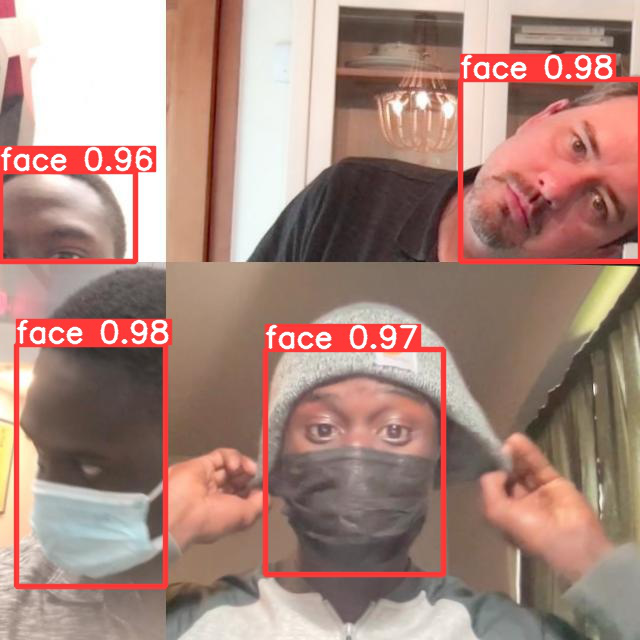

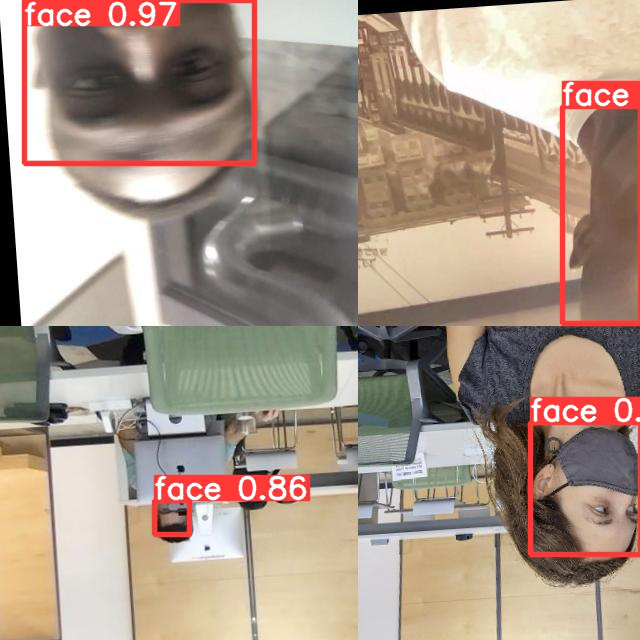

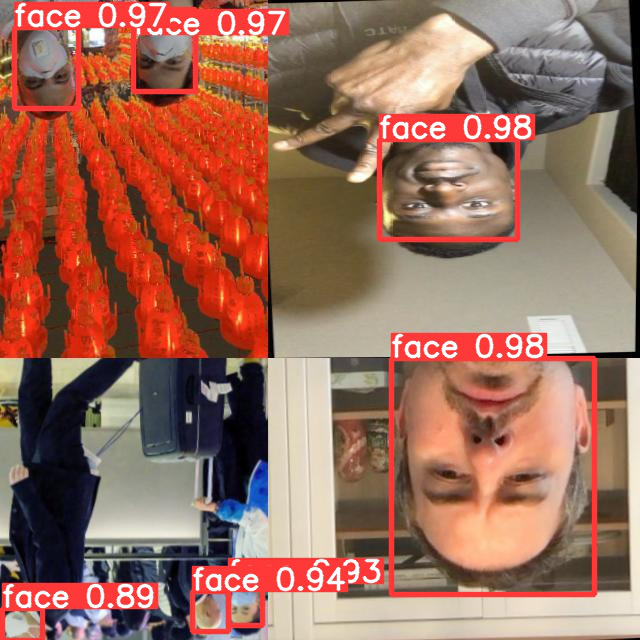

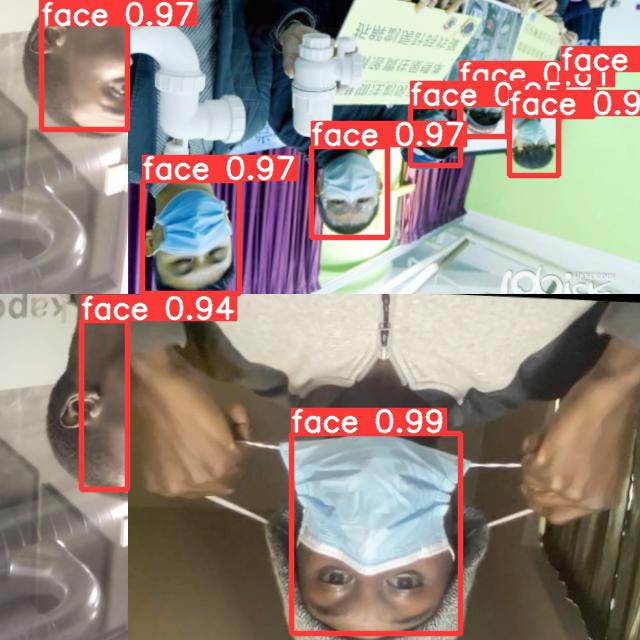

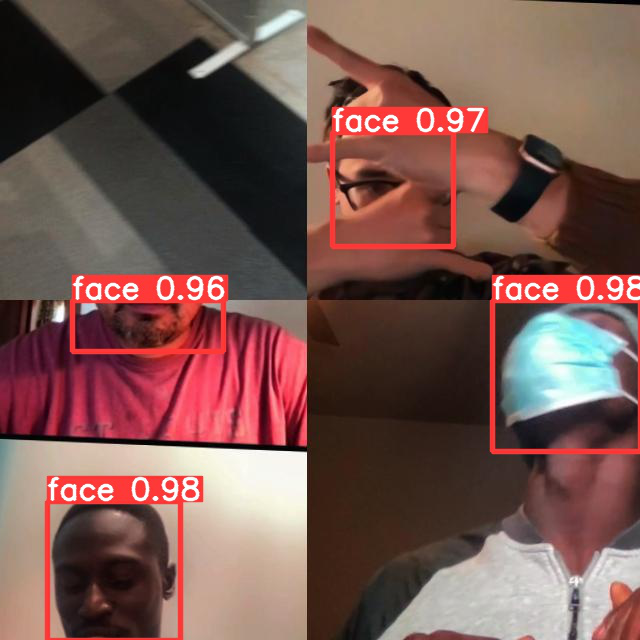

In [ ]:
count = 0
for imageName in glob('/content/yolov5/runs/detect/exp/*.jpg'):
  my_image = Image.open(imageName)
  display(my_image)
  count += 1
  if count == 5:
    break
  print("\n")

In [ ]:
!python detect.py --weights runs/train/yolov5l_results2/weights/best.pt --img 416 --conf 0.45 --iou 0.6 --source ../maxresdefault.jpg

detect: weights=['runs/train/yolov5l_results2/weights/best.pt'], source=../maxresdefault.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.45, iou_thres=0.6, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/maxresdefault.jpg: 256x416 1 face, 21.6ms
Speed: 0.3ms pre-process, 21.6ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp4


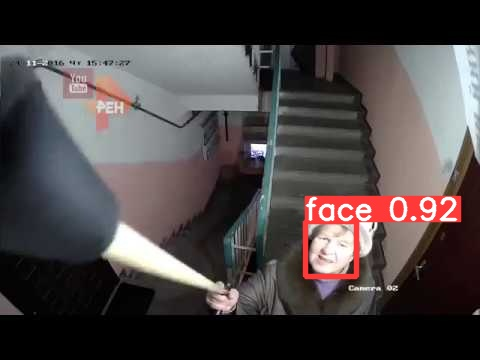

In [ ]:
for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

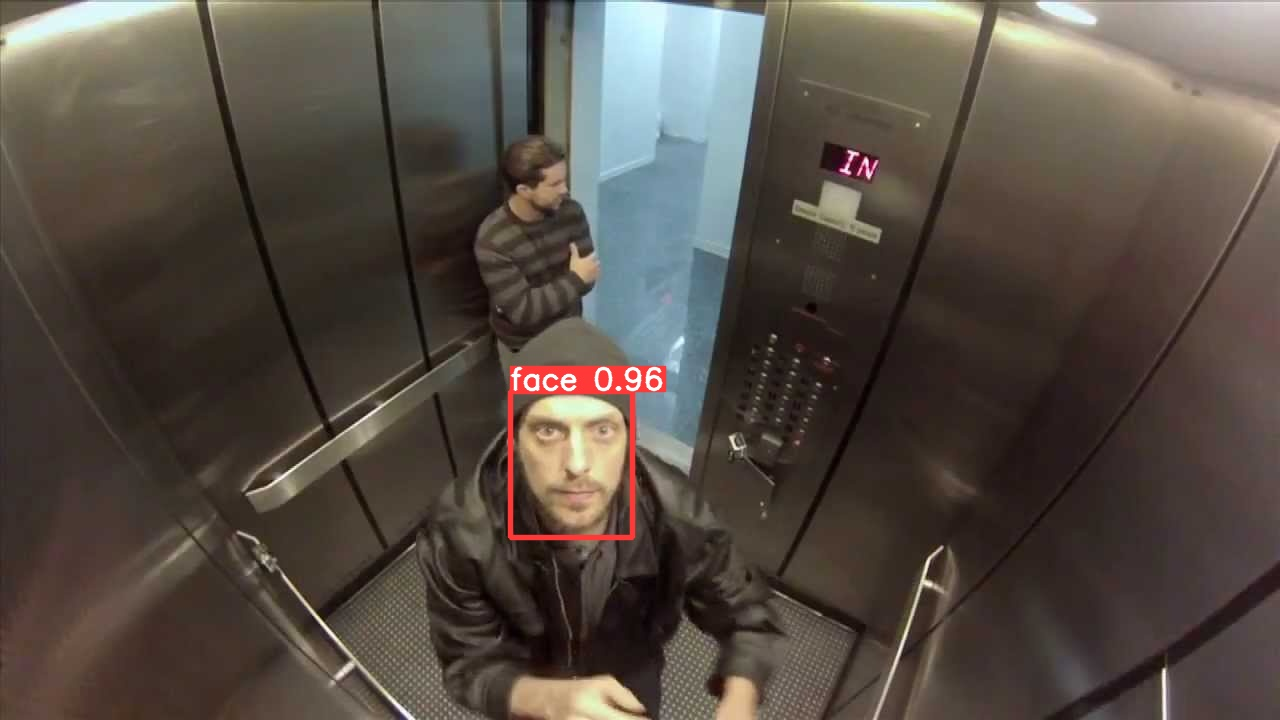

In [ ]:
for imageName in glob.glob('/content/yolov5/runs/detect/exp4/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!python detect.py --weights /content/best200.pt --img 416 --conf 0.4 --source /content/0031.jpg --save-txt 

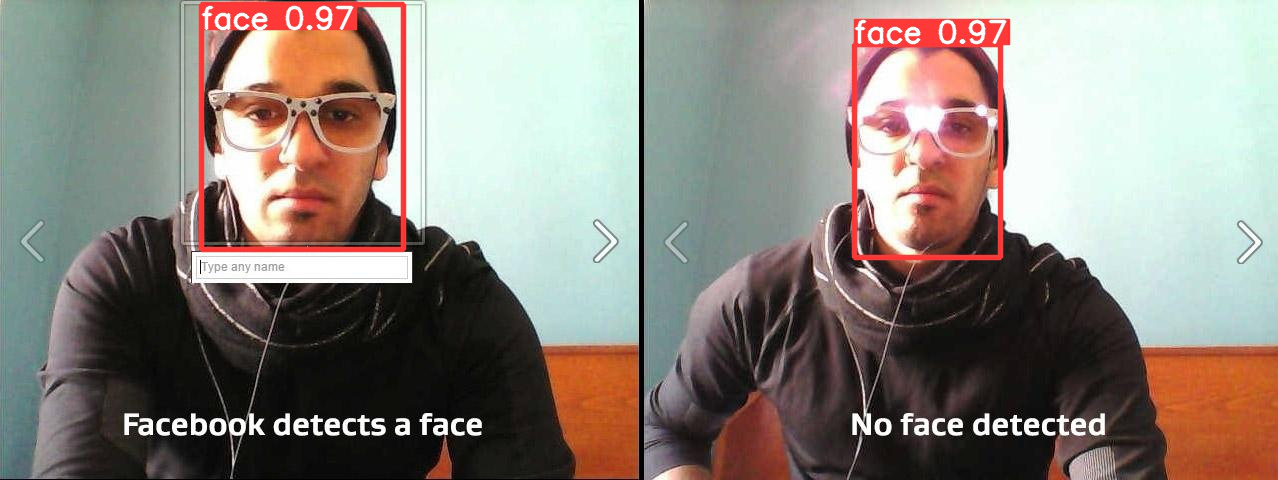

In [ ]:
my_image = Image.open('runs/detect/exp6/0031.jpg')
display(my_image)

In [ ]:
!python detect.py --weights /content/best200.pt --img 416 --conf 0.4 --source /content/images.jpg --save-txt 

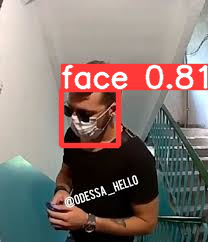

In [ ]:
my_image = Image.open('runs/detect/exp8/images.jpg')
display(my_image)

In [ ]:
from PIL import Image, ImageEnhance #read the image 
im = Image.open("/content/caOSclx4Piw.jpg") #image brightness enhancer 
enhancer = ImageEnhance.Sharpness(im)
factor = 2 #decrease constrast 
im_output = enhancer.enhance(factor) 
im_output.save("/content/caOSclx4Piw.jpg")

In [ ]:
%% time
!python detect.py --weights /content/best200.pt --img 416 --conf 0.2 --source /content/caOSclx4Piw.jpg --save-txt 

detect: weights=['/content/best200.pt'], source=/content/caOSclx4Piw.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-218-ge704970 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/caOSclx4Piw.jpg: 256x416 (no detections), 21.6ms
Speed: 0.3ms pre-process, 21.6ms inference, 0.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp14
0 labels saved to runs/detect/exp14/labels


(no detections)

# Выводы и гипотезы по улучшению распознавания


---


В ходе распознавания изображений было замечено, что модель хорошо справляется со всеми указанными возможными проблемами. Сложности возникают лишь со снимками очень плохого качества (последний пример, повышение качества через PIL.ImageEnhance не помогло)


---
### Советы по улучшению
#### Датасет
- ✅Рекомендуется ≥1500 изображений и ≥10000 экземпляров/instances (помеченных объектов) для класса
- ✅Разнообразие изображений: разное время суток, разное освещение, с разных ракурсов, из разных источников (взятые онлайн, собранные локально, с разных камер) и т.д.
- ✅У каждого изображения есть своя аннотация/label

#### Настройки обучения
- ✅Использовать самый большой возможный размер батчей/партии, который позволяет оборудование. Небольшие размеры партии приводят к плохой статистике batchnorm, и их следует избегать.